# 1. Normality Tests

   ### Shapiro-Wilk Test
   ### D’Agostino’s K^2 Test
   
       
       Assumptions: Observations in each sample are independent &identically distributed   
       H0: the sample has a Gaussian distribution.
       H1: the sample does not have a Gaussian distribution.
       
       

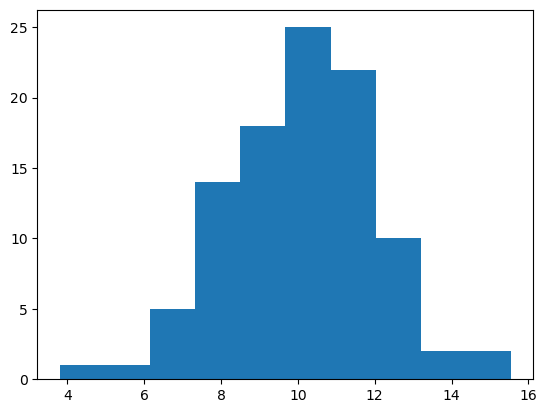

In [14]:
import matplotlib.pyplot as plt
import numpy as np
data = [7.556630067729888, 10.861531850401017, 10.591513962912662, 10.729808265718269,
        7.455314220035622, 10.316936816782533, 11.98959735335612, 11.973734217991362, 
        9.619909607946294, 10.420389452322686, 9.153810744288625, 8.417260218609252, 
        8.45729587801668, 9.440248978543757, 10.934803325685284, 10.228079763768235, 
        10.782567902605408, 6.152131817342431, 9.626361970913164, 11.235513814585277, 
        9.588231278706388, 11.201532965070314, 10.135567273876745, 7.465753234281429, 
        12.639039701765292, 8.142397494541733, 8.356770016840946, 9.678351339068623, 
        8.304616048603874, 10.85443550606233, 6.288915132497708, 7.409034690427369, 
        15.545817968897024, 13.318607202010575, 11.475437923479715, 13.00568632458133, 
        10.343442263886283, 7.1229873435874005, 11.574988250342136, 10.866962679085711,
        14.835838422102054, 10.434494432324874, 10.121493179487931, 10.052081817000358, 
        7.276921473948136, 11.46316001504082, 7.605345894001436, 12.897335087850642,
        12.350516430973052, 9.232600487245605, 12.193246645493002, 10.075920543912021,]

plt.hist(x)
plt.show()

In [19]:
from scipy.stats import shapiro, normaltest
sha_stat, sha_p = shapiro(data)
nor_stat, nor_p = normaltest(data)

print('FOR SHAPIRO: ', sha_p*100,'percent of data supports Ho')
print('Gaussian') if sha_p > 0.05 else print('not Gaussian')
 
print('FOR NORMAL: ', nor_p*100,'percent of data supports Ho')  
print('Gaussian') if nor_p > 0.05 else print('not Gaussian')
  

FOR SHAPIRO:  55.861735343933105 percent of data supports Ho
Gaussian
FOR NORMAL:  71.90295842872516 percent of data supports Ho
Gaussian


### Anderson-Darling Test
    It is the robust test to find normal distribution
    Tests whether a data sample has a Gaussian distribution.

    Assumptions
    Observations in each sample are independent and identically distributed (iid).
    
    Interpretation
    H0: the sample has a Gaussian distribution.
    H1: the sample does not have a Gaussian distribution.

In [45]:
from scipy.stats import anderson
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
         print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
         print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.424
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


# 2. Correlation Tests
### Pearson’s Correlation Coefficient
        Tests whether two samples have a linear relationship.

        Assumptions
            Observations in each sample are independent and identically distributed 
            Observations in each sample are normally distributed.
            Observations in each sample have the same variance.
        
        Interpretation
            H0: the two samples are independent.
            H1: there is a dependency between the samples.

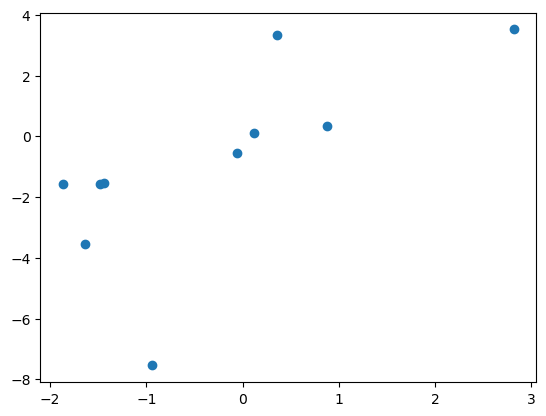

In [2]:
import matplotlib.pyplot as plt
x = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
y = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
plt.scatter(x,y)

In [27]:
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('p=', p)
print('level of confidence: ', int(p*100),"%")
print('independent') if p > 0.05  else  print('dependent')

    

p= 0.027872969514496103
level of confidence:  2 %
dependent


### Spearman’s Rank Correlation
    Tests whether two samples have a monotonic relationship.
    
    Assumptions
    Observations in each sample are independent and identically distributed
    Observations in each sample can be ranked.
    
    Interpretation
    H0: the two samples are independent.
    H1: there is a dependency between the samples.

In [29]:
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('p=', p)
print('level of confidence: ', int(p*100),"%")
print('independent') if p > 0.05  else  print('dependent')

p= 0.0016368033159867143
level of confidence:  0 %
dependent


### Kendall’s Rank Correlation
    It helps when duplicate ranks exists
    Tests whether two samples have a monotonic relationship.

    Assumptions
    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample can be ranked.
    
    Interpretation
    H0: the two samples are independent.
    H1: there is a dependency between the samples.

In [30]:
# Example of the Kendall's Rank Correlation Test
from scipy.stats import kendalltau
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = kendalltau(data1, data2)
print('p=', p)
print('level of confidence: ', int(p*100),"%")
print('independent') if p > 0.05  else  print('dependent')

p= 0.002212852733686067
level of confidence:  0 %
dependent


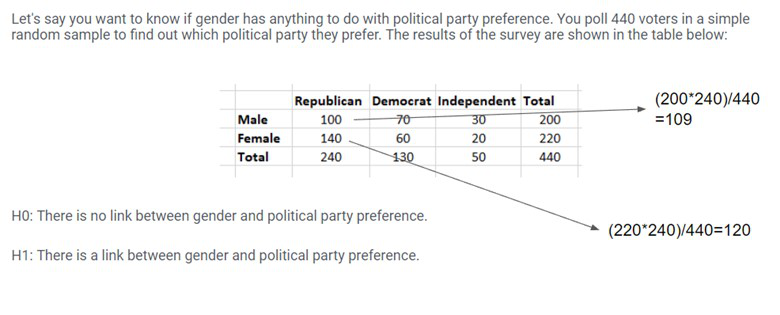

In [2]:
from PIL import Image
input_image = Image.open("chisquare.jpg")
display(input_image)

### Chi-Squared Test
    Tests whether two categorical variables are related or independent.

    Assumptions
    Observations used in the calculation of the contingency table are independent.
    25 or more examples in each cell of the contingency table.
    
    Interpretation
    H0: the two samples are independent.
    H1: there is a dependency between the samples.

In [3]:
from scipy.stats import chi2_contingency
table = [[100, 70, 30],[140,  60,  20],[240,130,50]]
stat, p, dof, expected = chi2_contingency(table)

print('p=', p)
print('level of confidence: ', int(p*100),"%")
print('independent') if p > 0.05  else  print('dependent')

p= 0.07480248594411863
level of confidence:  7 %
independent


# 3. Stationary Tests

        It will check if the mean and variance are constant over a period of time

### Augmented Dickey-Fuller Unit Root Test
    Tests whether a time series has a unit root, e.g. has a trend or more generally is  autoregressive.

    Assumptions
    Observations in are temporally ordered.
    
    Interpretation
    H0: a unit root is present (series is non-stationary).
    H1: a unit root is not present (series is stationary).

In [43]:
from statsmodels.tsa.stattools import adfuller
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
     print('Probably not Stationary')
else:
     print('Probably Stationary')

stat=2.092, p=0.999
Probably not Stationary


### Kwiatkowski-Phillips-Schmidt-Shin
    Tests whether a time series is trend stationary or not.

    Assumptions
    Observations in are temporally ordered.
    
    Interpretation
    H0: the time series is trend-stationary.
    H1: the time series is not trend-stationary.

In [44]:
from statsmodels.tsa.stattools import kpss
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, crit = kpss(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
     print('Probably Stationary')
else:
     print('Probably not Stationary')

stat=0.594, p=0.023
Probably not Stationary


# 4. Parametric Statistical Hypothesis Tests

### One sample T-TEST
     Ho:μ=x 
     Ha:μ≠x

In [5]:
from scipy.stats import ttest_1samp
data = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
x=sum(data)/len(data)
print(x)
stat, p = ttest_1samp(data, 0)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
     print('Probably the same mean')
else:
     print('Probably different mean')


-0.15209999999999999
stat=-0.577, p=0.578
Probably the same mean


### Independent sample T-Test or Student’s t-test
    Tests whether the means of two independent samples are significantly different.

    Assumptions
    Observations in each sample are independent and identically distributed
    Observations in each sample are normally distributed.
    Observations in each sample have the same variance.
    
    Interpretation
    H0: the means of the samples are equal.
    H1: the means of the samples are unequal.

In [36]:
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
     print('Probably the same distribution')
else:
     print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution


### Paired Student’s t-test
    It is conducted on same data in different time intervals
    EXAMPLE:  
    One approach you might consider would be to measure the performance of a sample of employees before     and after completing the program, and analyze the differences using a paired sample t-test.
    
    Tests whether the means of two paired samples are significantly different.

    Assumptions
    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample are normally distributed.
    Observations in each sample have the same variance.
    Observations across each sample are paired.
    
    Interpretation
    H0: the means of the samples are equal.
    H1: the means of the samples are unequal.

In [37]:
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
     print('Probably the same distribution')
else:
     print('Probably different distributions')

stat=-0.334, p=0.746
Probably the same distribution


### Analysis of Variance Test (ANOVA)
    Tests if the means of 2 or more independent samples are significantly different.

    Assumptions
    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample are normally distributed.
    Observations in each sample have the same variance.
    
    Interpretation
    H0: the means of the samples are equal.
    H1: one or more of the means of the samples are unequal.

In [38]:
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
     print('Probably the same distribution')
else:
     print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution


# 5. Nonparametric Statistical Hypothesis Tests

        In Nonparametric Test, it will not assume data to be in Normal Distribution

### Mann-Whitney U Test
    Tests whether the distributions of two independent samples are equal or not.

    Assumptions
    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample can be ranked.
    
    Interpretation
    H0: the distributions of both samples are equal.
    H1: the distributions of both samples are not equal.

In [39]:
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
     print('Probably the same distribution')
else:
     print('Probably different distributions')

stat=40.000, p=0.473
Probably the same distribution


### Wilcoxon Signed-Rank Test
    Tests whether the distributions of two paired samples are equal or not.

    Assumptions
    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample can be ranked.
    Observations across each sample are paired.
    
    Interpretation
    H0: the distributions of both samples are equal.
    H1: the distributions of both samples are not equal.

In [40]:
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
     print('Probably the same distribution')
else:
     print('Probably different distributions')

stat=21.000, p=0.557
Probably the same distribution


### Kruskal-Wallis H Test
    Tests whether the distributions of two or more independent samples are equal or not.

    Assumptions
    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample can be ranked.
   
    Interpretation
    H0: the distributions of all samples are equal.
    H1: the distributions of one or more samples are not equal.

In [41]:
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
     print('Probably the same distribution')
else:
     print('Probably different distributions')

stat=0.571, p=0.450
Probably the same distribution


### Friedman Test
    Tests whether the distributions of two or more paired samples are equal or not.

    Assumptions
    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample can be ranked.
    Observations across each sample are paired.
    
    Interpretation
    H0: the distributions of all samples are equal.
    H1: the distributions of one or more samples are not equal.

In [42]:
from scipy.stats import friedmanchisquare
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
     print('Probably the same distribution')
else:
     print('Probably different distributions')

stat=0.800, p=0.670
Probably the same distribution


# Z - TEST 

In [ ]:
# Z-test 

#         It is a statistical method to determine whether the distribution of the test statistics 
#         can be approximated by a normal distribution. It is the method to determine whether two 
#         sample means are approximately the same or different when their variance is known and 
#         the sample size is large (should be >= 30).

# When to Use Z-test:

#         The sample size should be greater than 30. Otherwise, we should use the t-test.
#         Samples should be drawn at random from the population.
#         The standard deviation of the population should be known.
#         Samples that are drawn from the population should be independent of each other.
#         The data should be normally distributed, however for large sample size, it is assumed to 
#         have a normal distribution.

In [ ]:
import pandas as pd
from statsmodels.stats import weightstats as stests
dataframe = pd.read_csv(r"C:\Users\ANAND\Desktop\BP.csv")
dataframe[['patient_bp_before','patient_bp_after']].describe()
ztest ,propability_value = stests.ztest(dataframe['patient_bp_before'], x2=None, value=146)
print(float(propability_value))
if propability_value<0.05:
    print("Null hyphothesis rejected , Alternative hyphothesis accepted")
else:
    print("Null hyphothesis accepted , Alternative hyphothesis rejected")